In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [22]:
with_mask_files = os.listdir('archive/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [26]:
without_mask_files = os.listdir('archive/data/without_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [27]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828




with mask --> 1

without mask --> 0


In [38]:

with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files) 
print(with_mask_labels[0:5])


[1, 1, 1, 1, 1]


In [40]:
all_files = with_mask_files + without_mask_files
all_labels = with_mask_labels + without_mask_labels 
print(all_files[0:5])
print(all_files[-5:])
print(all_labels[0:5])
print(all_labels[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


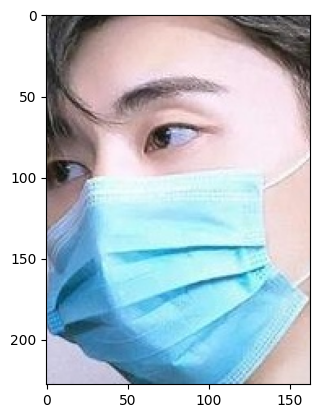

In [33]:
# displaying with mask image
img = mpimg.imread('archive/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

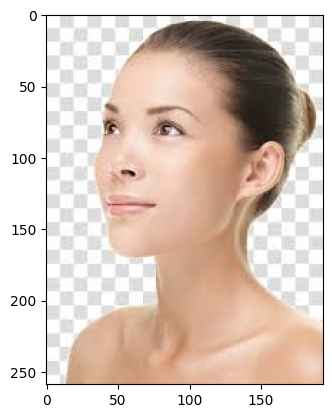

In [34]:
# displaying without mask image
img = mpimg.imread('archive/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [41]:
# convert images to numpy arrays+

with_mask_path = 'archive/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'archive/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

f:\Projects'\Face Mask Detection\venv\lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [42]:
type(data)
len(data)
data[0]
type(data[0])
data[0].shape

(128, 128, 3)

In [43]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(all_labels)

In [44]:
type(X)
type(Y)
X.shape
Y.shape

(7553,)

In [45]:
print(Y)

[1 1 1 ... 0 0 0]


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
X_train = X_train / 255
X_test = X_test / 255

X_test[0]

X_train shape: (6042, 128, 128, 3)
Y_train shape: (6042,)
X_test shape: (1511, 128, 128, 3)
Y_test shape: (1511,)


array([[[0.02745098, 0.00392157, 0.05882353],
        [0.03137255, 0.00784314, 0.0627451 ],
        [0.03529412, 0.01176471, 0.06666667],
        ...,
        [0.06666667, 0.01568627, 0.05098039],
        [0.0627451 , 0.01176471, 0.03921569],
        [0.05882353, 0.00784314, 0.03529412]],

       [[0.03529412, 0.00784314, 0.0627451 ],
        [0.03529412, 0.00784314, 0.0627451 ],
        [0.03529412, 0.01176471, 0.0627451 ],
        ...,
        [0.07058824, 0.01960784, 0.05098039],
        [0.06666667, 0.01568627, 0.04313725],
        [0.0627451 , 0.01176471, 0.04313725]],

       [[0.04313725, 0.00784314, 0.06666667],
        [0.03921569, 0.00784314, 0.0627451 ],
        [0.03529412, 0.00784314, 0.05882353],
        ...,
        [0.0745098 , 0.02352941, 0.05098039],
        [0.0745098 , 0.02352941, 0.05098039],
        [0.0745098 , 0.02352941, 0.05098039]],

       ...,

       [[0.93333333, 0.88627451, 0.70980392],
        [0.95294118, 0.90196078, 0.72941176],
        [0.98431373, 0

In [51]:
import tensorflow as tf
from tensorflow import keras

In [54]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(236, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [55]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [56]:
# training the neural network
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 32s 177ms/step - acc: 0.6524 - loss: 0.8308 - val_acc: 0.8843 - val_loss: 0.2866
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - acc: 0.8729 - loss: 0.3284 - val_acc: 0.8860 - val_loss: 0.2848
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 177ms/step - acc: 0.9035 - loss: 0.2433 - val_acc: 0.8992 - val_loss: 0.2743
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 171ms/step - acc: 0.9244 - loss: 0.2001 - val_acc: 0.9372 - val_loss: 0.2159
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - acc: 0.9318 - loss: 0.1896 - val_acc: 0.9306 - val_loss: 0.1891
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - acc: 0.9469 - loss: 0.1401 - val_acc: 0.9339 - val_loss: 0.2099
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 174ms/step - acc: 0.9618 - loss: 0.1024 - val_acc: 0.9190 - val_loss: 0.2502
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - acc: 0.9641 - loss: 0.0955 - val_acc: 0.9421 - val_loss: 0.2305
Epoch 9/10
170/170 ━━━━━━━━━━━━━

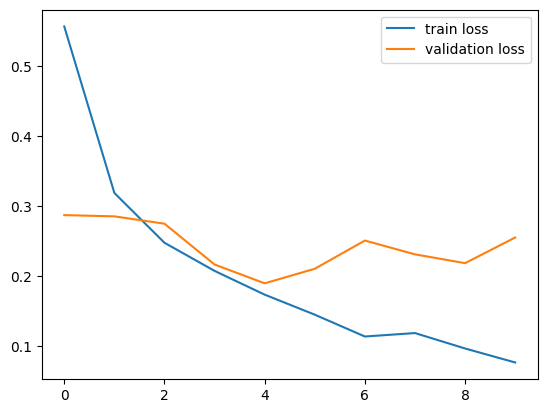

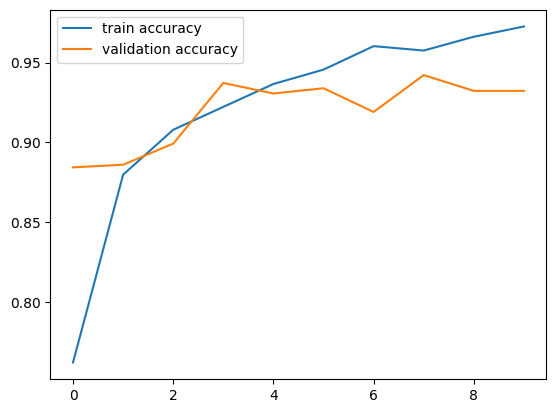

In [60]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [59]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.9413 - loss: 0.1852
Test Accuracy = 0.9417604207992554


In [61]:
model.save('face_mask_model.h5')  # You can use .h5 or .keras


In [7]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the trained model
model = load_model('face_mask_model.h5')

# Correct image path (no extra quotes)
img_path = r"archive/data/with_mask/with_mask_1545.jpg"
input_image = cv2.imread(img_path)

# Check if image was loaded
if input_image is None:
    raise FileNotFoundError("Could not load image. Check the file path.")

# Preprocess
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))

# Predict
prediction = model.predict(input_image_reshaped)
print("Prediction:", prediction)
# Output
if prediction[0][0] > 0.5:
    print("No Mask Detected")
else:
    print("Mask Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction: [[0.8203822  0.20761937]]
No Mask Detected
